<a href="https://colab.research.google.com/github/khairuldzulqarnain/machine_learning/blob/main/predict_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_csv('income.csv', error_bad_lines=False)

<ipython-input-2-0beac38d255e>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df= pd.read_csv('income.csv', error_bad_lines=False)


# ***Data Exploration***

In [3]:

df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


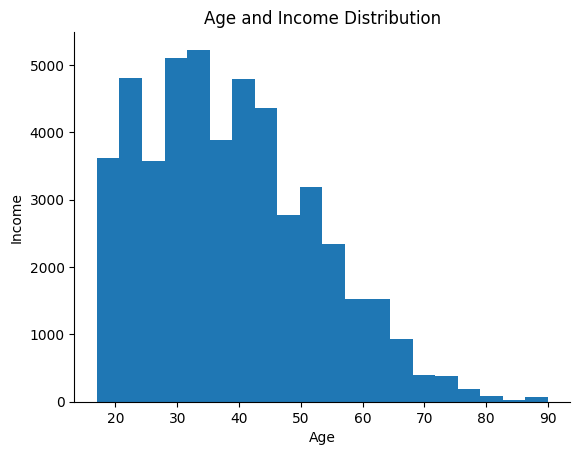

In [4]:
## Ages and income
df['age'].plot(kind='hist', bins=20, title='Age and Income Distribution')
plt.xlabel('Age')
plt.ylabel('Income')
plt.gca().spines[['top', 'right']].set_visible(False)


In [ ]:
## age and count
df['age'].plot(kind='hist', bins=20, title='Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)


# **Data Visualisation**

In [6]:
df.relationship.value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

<ipython-input-7-752f33d28d3a>:1: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(data=df, x='relationship', hue='income', palette=sns.palettes.mpl_palette('Dark2'))


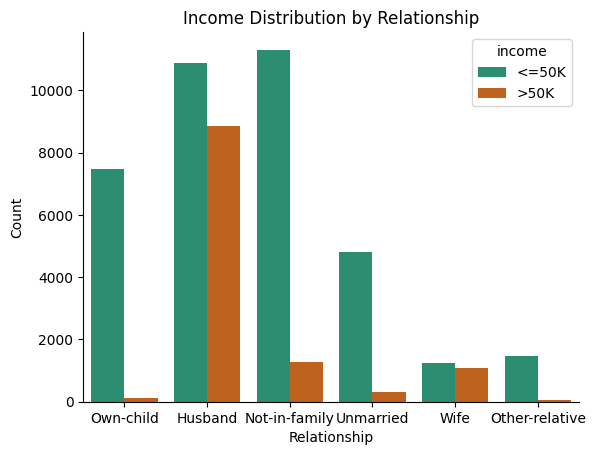

In [7]:
sns.countplot(data=df, x='relationship', hue='income', palette=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.title('Income Distribution by Relationship')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

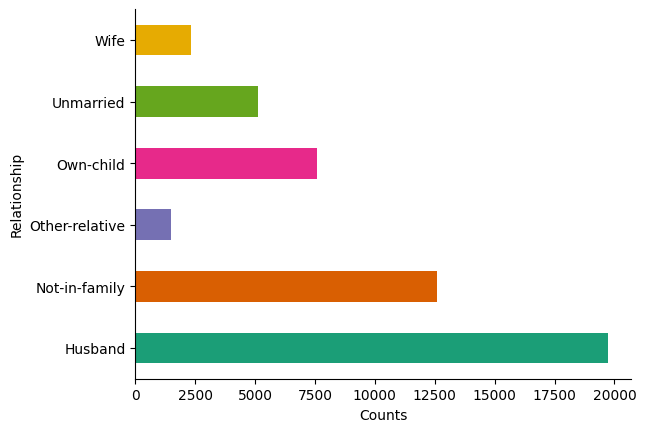

In [8]:
## Relationship and counts
df.groupby('relationship').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Counts')
plt.ylabel('Relationship')
plt.gca().spines[['top', 'right']].set_visible(False)

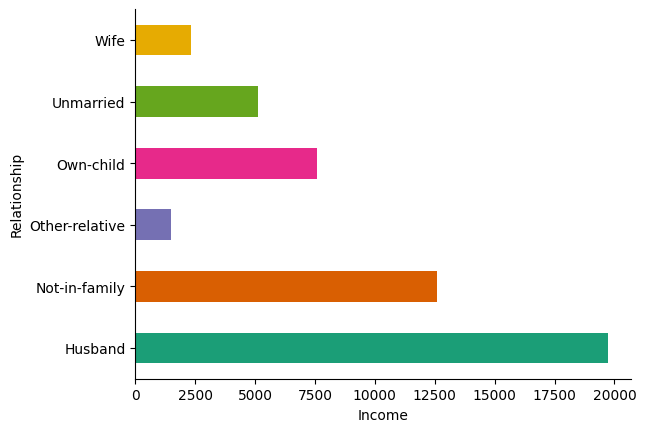

In [9]:
## relationship and income

df.groupby('relationship').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Income')
plt.ylabel('Relationship')
plt.gca().spines[['top', 'right']].set_visible(False)

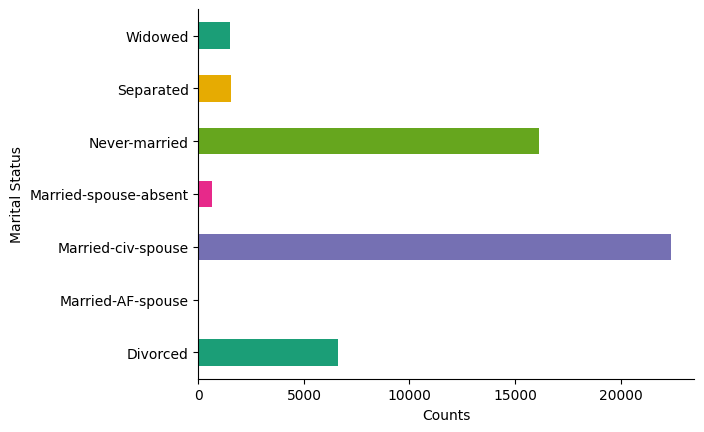

In [10]:
## Marital stastus
df.groupby('marital-status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Counts')
plt.ylabel('Marital Status')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.education.value_counts()

In [ ]:
df.workclass.value_counts()

In [ ]:
df.occupation.value_counts()

In [14]:
## concat the dummies and add prefix
df= pd.concat ([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)

In [15]:
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df['workclass']).add_prefix('workclass_')], axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital_status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df['relationship']).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df['race']).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native_country_')], axis=1)


In [16]:
df.drop('education', axis=1, inplace=True)


In [ ]:
df

In [18]:
## Numberical value for income and gender
df['income']= df['income'].apply(lambda x : 1 if x == '>50K' else 0)

In [19]:
df['gender']= df['gender'].apply(lambda x : 1 if x == 'Male' else 0)


In [ ]:
df

In [ ]:
df.columns.values

<Axes: >

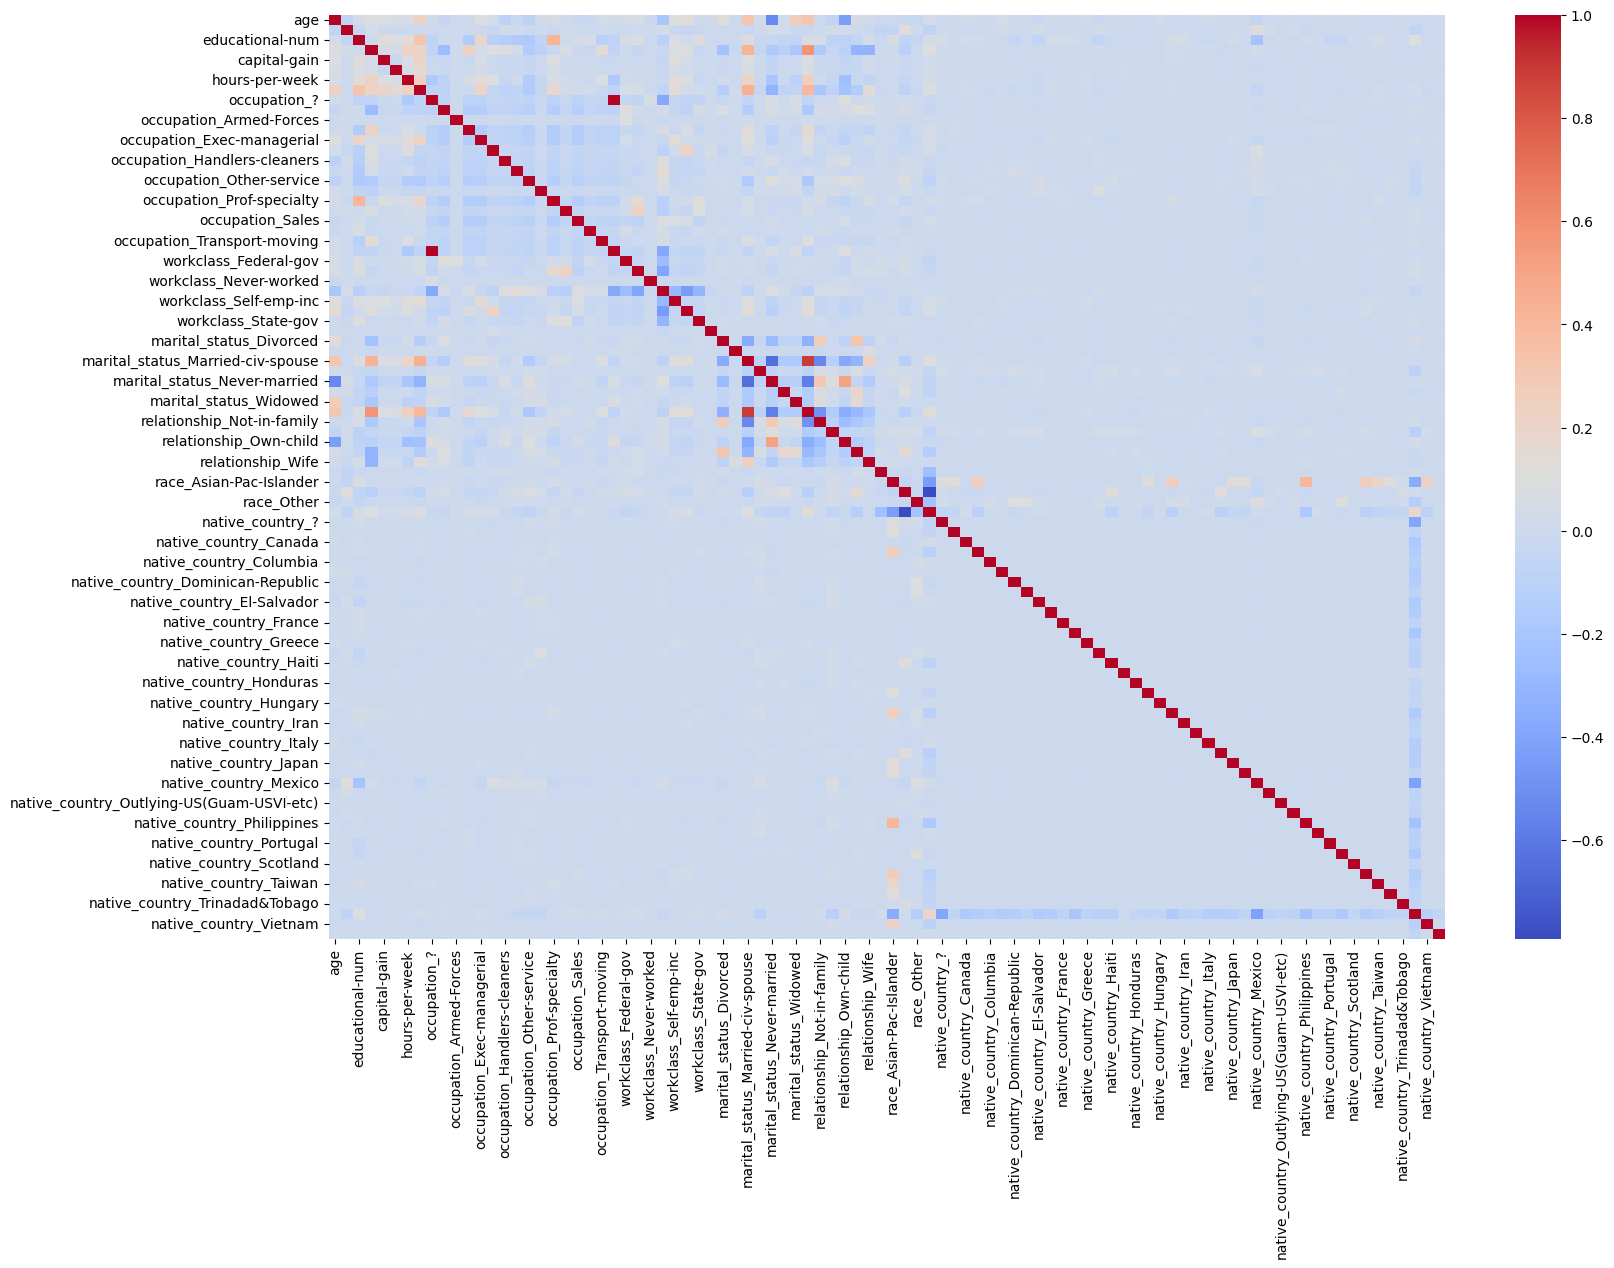

In [22]:


plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')


In [ ]:
## Too Much columns
df.corr()

In [24]:
## Filter the columns
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8* len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped= df.drop(cols_to_drop, axis=1)

In [ ]:
df_dropped

<Axes: >

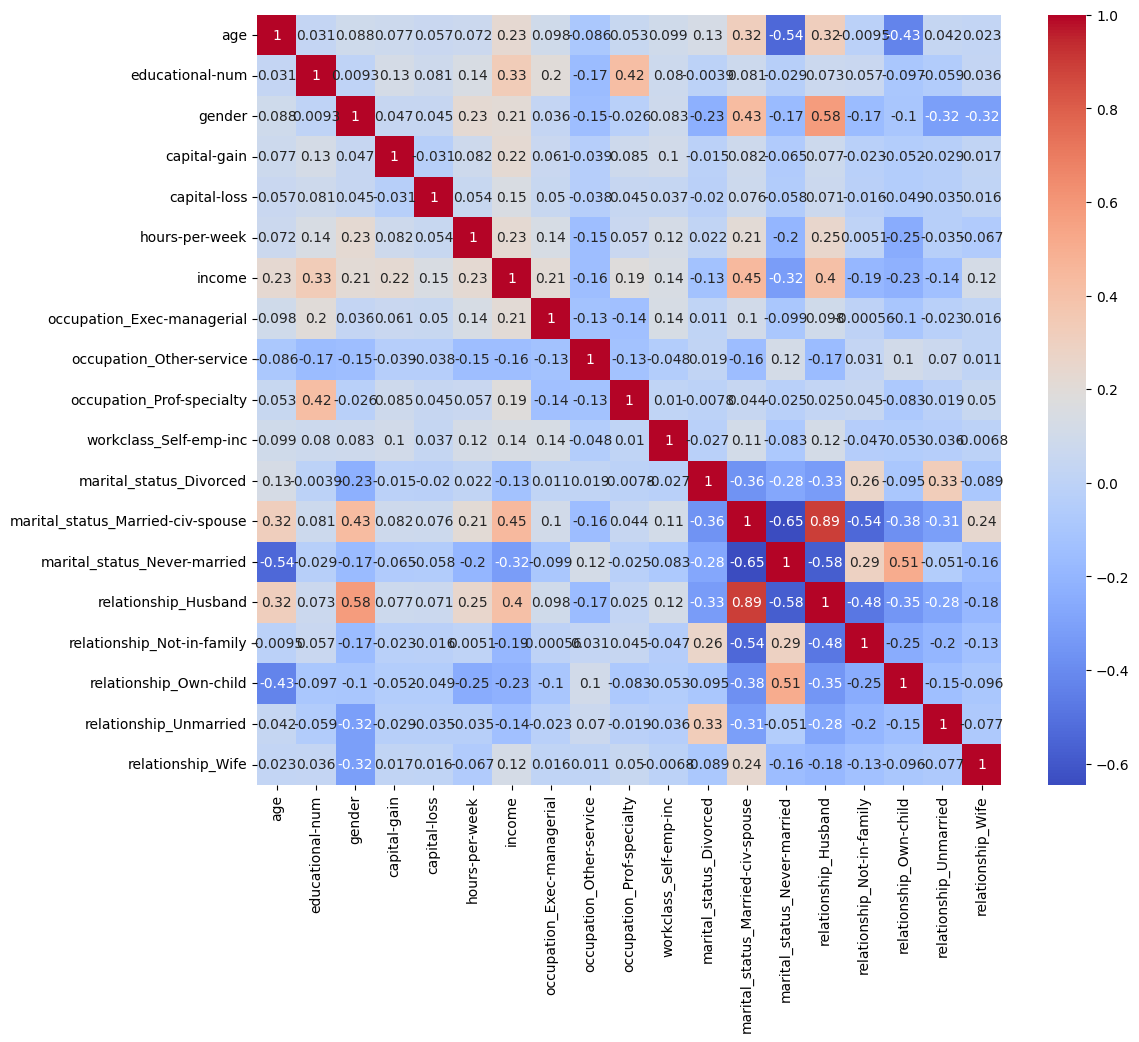

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

## Income high correlated with marital_status_Married-civ-spouse
## Income with husband second
## Income with edu number

# **2 Machine Learning Model**

# 1)Decision Tree (Factors higher the salaries)

# 2)Linear Regression ( Predic Monthly salaries)


In [27]:
## Model (decision tree)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Drop fnlwgt

df= df.drop('fnlwgt', axis= 1)
train_df, test_df = train_test_split (df, test_size= 0.2)

In [ ]:
train_df

In [ ]:
test_df

In [54]:
train_X= train_df.drop('income', axis=1)
train_Y= train_df['income']

test_X= test_df.drop('income', axis=1)
test_Y= test_df['income']




In [55]:
forest = RandomForestClassifier()
forest.fit(train_X, train_Y)

RandomForestClassifier()

In [57]:
## Test the scores

## 0.85 percent is quite good
forest.score(test_X,test_Y)

0.8504452861091207

In [ ]:
forest.feature_importances_

In [ ]:
forest.feature_names_in_

In [59]:
importances =dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key= lambda x : x[1], reverse= True)}


In [ ]:
importances

## Conclusion
## The older you get the higher the income
## The higher the education number the higher the income
## The more you work per week the higher your income

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100,250],
    'max_depth': [5,10,30,None],
    'min_samples_split': [2,4],
    'max_features': ['sqrt','log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid, verbose=10)



In [ ]:
grid_search.fit(train_X, train_Y)

In [65]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=4,
                       n_estimators=250)

In [67]:
forest.score(test_X,test_Y)

0.8504452861091207

In [37]:
### Second Model Development using LinearRegression

from sklearn.linear_model import LinearRegression
Linear_Regression_model = LinearRegression
from sklearn.metrics import mean_squared_error

In [38]:
## Dependent and independent variables
## Spilt the data into training and testing

x = df[['age', 'gender']]
y = df['income']

from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split (x,y, test_size=0.2, random_state=42)

train_X.head()

,age,gender
37193,42,1
31093,52,1
33814,34,1
14500,28,0
23399,46,1


In [ ]:
df

In [40]:
train_X.shape, train_Y.shape,

((39073, 2), (39073,))

In [41]:
test_X.shape, test_Y.shape

((9769, 2), (9769,))

In [42]:
## Model Training

model = LinearRegression()
model.fit(train_X, train_Y)

LinearRegression()

In [43]:
## Model Prediction

y_pred = model.predict(test_X)
y_pred

array([0.23936549, 0.20728376, 0.1519606 , ..., 0.03093846, 0.16021959,
       0.38881698])

In [44]:
mse = mean_squared_error(test_Y, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.16354416612069345


 **Make Prediction**

**Employees Detailst**

Name = Ali, Aminah, Abu

Employees No = 1,2,3

Age= 30,40,50

Gender = 'Male'= 1, 'Female'= 0

***Ringgit Per Minutes***


In [ ]:

Monthly_salary = pd.DataFrame({'age': [30, 40, 50], 'gender': ['1', '0', '1']})

# Make predictions on monthly salary
situations = model.predict(Monthly_salary)

# Print the predictions
print("Predictions for employees:")
for i, prediction in enumerate(situations):
    print(f"Prediction for employees {i+1}: {prediction}")

In [47]:
###Ringgit Malaysia Per Minutes

Monthly_salary = pd.DataFrame({'age': [30, 40, 50], 'gender': ['1', '0', '1']})

# Make predictions on monthly salary
situations = model.predict(Monthly_salary)

# Print the predictions in Ringgit Malaysia
print("Predictions for employees: (in Ringgit Malaysia):")
for i, prediction in enumerate(situations):
    print(f"Prediction for employees {i+1}: RM {prediction:.2f}")

Predictions for employees: (in Ringgit Malaysia):
Prediction for employees 1: RM 0.24
Prediction for employees 2: RM 0.13
Prediction for employees 3: RM 0.38


In [ ]:
### Employees 1 (RM0.24*60*8*30) = RM3456 Monthly as he working 8 hours perday and 30 days monthly. Male gender
### Employees 2 (RM0.13*60*8*30) = RM1872 Monthly as he working 8 hours perday and 30 days monthly. Lower rate because Female
### Employees 3 (RM0.38*60*8*30) = RM5472 Monthly as he working 8 hours perday and 30 days monthly. Male gender

# 2 Perfomance Metrix

# 1) Evaluating Model Performance: Accuracy in Decision Tree for Salary Prediction

In the realm of machine learning, assessing model performance is paramount to ensure reliable predictions. One crucial metric, **accuracy**, measures the proportion of correctly classified instances out of the total instances. In our classification task, centered on predicting factors leading to higher salaries using Decision Tree algorithm, we achieved an accuracy score of **0.850**. This implies that our model accurately predicts the outcome in **85% of cases**, exhibiting commendable performance.

# 2) Mean Squared Error in Linear Regression for Monthly Salary Prediction

In the domain of predictive modeling, evaluating model performance is crucial to gauge its effectiveness. One key metric, **mean squared error (MSE),** measures the average squared difference between the actual and predicted values. In our task of predicting monthly salaries using Linear Regression, our model achieved an MSE of 0.1635. This implies that, on average, the squared difference between our **predicted salaries and the actual salaries is 0.1635**. While a lower MSE indicates better model performance, it's essential to consider other metrics like R-squared and mean absolute error to gain a holistic understanding. Thus, while acknowledging our accomplishment, let's continue refining our model to enhance its predictive accuracy for monthly salary estimation.

Conclusion, In evaluating the performance of our machine learning models, both in predicting factors influencing higher salaries with Decision Tree and estimating monthly salaries using Linear Regression, we've gained valuable insights. The accuracy score of 0.850 for the Decision Tree model signifies its commendable ability to classify instances correctly,

while the mean squared error (MSE) of 0.1635 for the Linear Regression model reflects its precision in predicting monthly salaries. While these metrics provide useful snapshots of our models' efficacy, it's imperative to consider additional factors and metrics for a comprehensive assessment. Continuously refining our models and exploring alternative approaches will be instrumental in enhancing their predictive capabilities, ensuring more accurate and reliable outcomes in real-world applications.

# Comparison and Analysis:

In comparing the performance of our machine learning models, namely the Decision Tree model and Linear Regression model, based on their respective metrics, we gain valuable insights into their strengths and limitations.

The Decision Tree model, with an accuracy score of 0.850, showcases its ability to classify instances correctly, particularly in predicting factors influencing higher salaries. This indicates that the model is effective in capturing the underlying patterns and relationships within the data, making it a suitable choice for classification tasks where interpretability is crucial.

On the other hand, the Linear Regression model, with a mean squared error (MSE) of 0.1635, demonstrates its precision in predicting monthly salaries. Despite not directly comparable to accuracy, a lower MSE suggests that the model's predictions are closer to the actual values on average, indicating its capability in capturing the underlying linear relationship between the input features and the target variable.

While both models exhibit promising performance in their respective tasks, it's essential to consider the nature of the problem and the specific requirements of the application. **Decision Tree models excel in capturing complex, nonlinear relationships and are more interpretable, making them suitable for classification tasks.** Meanwhile, **Linear Regression models are adept at capturing linear relationships and are often used in regression tasks where predicting numerical values is the goal.**

In conclusion, our analysis highlights the strengths of both models and underscores the importance of selecting the appropriate model based on the task at hand. By understanding their performance metrics and limitations, we can make informed decisions to achieve optimal results in our machine learning endeavors.




